# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [41]:
#Dependencies
import requests
import json
from pprint import pprint
from config import api_key
import random as random
import numpy as np
from citipy import citipy
import pandas as pd
import time
from collections import OrderedDict
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

In [14]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [ ]:
#Generate a random list of cities randomly from api, and count them
#Will use long and lat to create list

long = []
lat = []

for x in np.random.randint(-80,80,2000):
    lat.append(x)

for y in np.random.randint(-160,160,2000):
    long.append(y)


In [ ]:
#Define variable to store long and lat
long_and_lat = tuple(zip(long,lat))

In [ ]:
#Find nearest cities to all latitudes and longitudes
cities = []
country = []

for lat,long in long_and_lat:
    city = citipy.nearest_city(lat,long)
    name = city.city_name
    cities.append(name)
    country.append(city.country_code)

In [ ]:
city_and_country = pd.DataFrame({"Cities":cities, "Country Code": country})
cit_list = city_and_country["Cities"].to_list()
code_list = city_and_country["Country Code"].to_list()
cclist = list(zip(cit_list, code_list))
cclist

In [ ]:
#Dropped duplicates from my list through changing to a dictonary then back to a list
cclist = list(OrderedDict.fromkeys(cclist))
cclist = list(dict.fromkeys(cclist))

In [ ]:
#cclist
print(len(cclist))
#474 is less than 2000, so duplicates have been successfully dropped

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + api_key

In [7]:
print(url)http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=3f73577842ef2f0e3815789839bdfcd5

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=3f73577842ef2f0e3815789839bdfcd5


In [ ]:
#query_url = url + "q=" + city + "," + code + "&appid=" + api_key + "&units=" + units

In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
""
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bajos de haina
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | groningen
Processing Record 5 of Set 1 | boyolangu
Processing Record 6 of Set 1 | ivanovskoye
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | fortuna
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | saint anthony
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | leningradskiy
Processing Record 14 of Set 1 | eureka
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | mecca
Processing Record 18 of Set 1 | sinnamary
Processing Record 19 of Set 1 | lubao
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | goure
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Se

Processing Record 36 of Set 4 | pumiao
Processing Record 37 of Set 4 | hovd
Processing Record 38 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 39 of Set 4 | luis correia
Processing Record 40 of Set 4 | faanui
Processing Record 41 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | visakhapatnam
Processing Record 44 of Set 4 | jabiru
City not found. Skipping...
Processing Record 45 of Set 4 | jiuquan
Processing Record 46 of Set 4 | mandalgovi
Processing Record 47 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | ankang
Processing Record 0 of Set 5 | hilo
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | rurrenabaque
Processing Record 3 of Set 5 | patitirion
Processing Record 4 of Set 5 | ciro marina
Processing Record 5 of Set 5 | longyearbyen
Processing Record 6 of Set 5 | corvallis
Processing Recor

Processing Record 23 of Set 8 | agadez
Processing Record 24 of Set 8 | alugan
Processing Record 25 of Set 8 | conversion
Processing Record 26 of Set 8 | krasnogorsk
Processing Record 27 of Set 8 | san policarpo
Processing Record 28 of Set 8 | amapa
Processing Record 29 of Set 8 | tungkang
City not found. Skipping...
Processing Record 30 of Set 8 | mishan
Processing Record 31 of Set 8 | pyapon
Processing Record 32 of Set 8 | warqla
City not found. Skipping...
Processing Record 33 of Set 8 | kinlochleven
Processing Record 34 of Set 8 | juterbog
Processing Record 35 of Set 8 | balgazyn
Processing Record 36 of Set 8 | moba
Processing Record 37 of Set 8 | itoman
Processing Record 38 of Set 8 | nemuro
Processing Record 39 of Set 8 | kenora
Processing Record 40 of Set 8 | dali
Processing Record 41 of Set 8 | scarborough
Processing Record 42 of Set 8 | skjervoy
Processing Record 43 of Set 8 | awbari
Processing Record 44 of Set 8 | olinda
Processing Record 45 of Set 8 | koboldo
City not found. 

Processing Record 11 of Set 12 | genhe
Processing Record 12 of Set 12 | durazno
Processing Record 13 of Set 12 | soe
Processing Record 14 of Set 12 | russell
Processing Record 15 of Set 12 | yanan
City not found. Skipping...
Processing Record 16 of Set 12 | pudozh
Processing Record 17 of Set 12 | maine-soroa
Processing Record 18 of Set 12 | kaili
Processing Record 19 of Set 12 | vao
Processing Record 20 of Set 12 | belaya gora
Processing Record 21 of Set 12 | point pedro
Processing Record 22 of Set 12 | tazovskiy
Processing Record 23 of Set 12 | vanavara
Processing Record 24 of Set 12 | chapais
Processing Record 25 of Set 12 | takoradi
Processing Record 26 of Set 12 | key west
Processing Record 27 of Set 12 | vallenar
Processing Record 28 of Set 12 | lahij
Processing Record 29 of Set 12 | ternate
Processing Record 30 of Set 12 | flinders
Processing Record 31 of Set 12 | yuzhne
Processing Record 32 of Set 12 | sheridan
Processing Record 33 of Set 12 | voh
Processing Record 34 of Set 12 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
city_list_df = pd.DataFrame(city_data)
path = "cities.csv"
city_list_df.to_csv(path)
city_list_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bajos de haina,18.4154,-70.0332,25.56,94,20,2.06,DO,1616471944
1,busselton,-33.6500,115.3333,16.11,71,45,0.89,AU,1616471945
2,east london,-33.0153,27.9116,16.00,94,0,2.06,ZA,1616471945
3,groningen,53.2500,6.7500,4.44,93,90,3.09,NL,1616471945
4,boyolangu,-8.1181,111.8935,29.86,64,95,2.72,ID,1616471945
...,...,...,...,...,...,...,...,...,...
547,tessaoua,13.7574,7.9874,26.60,16,31,4.00,NE,1616472087
548,ciudad bolivar,8.1222,-63.5497,27.02,65,72,5.31,VE,1616472087
549,erdenet,49.0333,104.0833,3.82,41,87,1.80,MN,1616472088
550,revelganj,25.7833,84.6667,28.00,34,20,2.06,IN,1616472088


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
clean_city_data = city_list_df.loc[city_list_df["Humidity"] < 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bajos de haina,18.4154,-70.0332,25.56,94,20,2.06,DO,1616471944
1,busselton,-33.6500,115.3333,16.11,71,45,0.89,AU,1616471945
2,east london,-33.0153,27.9116,16.00,94,0,2.06,ZA,1616471945
3,groningen,53.2500,6.7500,4.44,93,90,3.09,NL,1616471945
4,boyolangu,-8.1181,111.8935,29.86,64,95,2.72,ID,1616471945
...,...,...,...,...,...,...,...,...,...
547,tessaoua,13.7574,7.9874,26.60,16,31,4.00,NE,1616472087
548,ciudad bolivar,8.1222,-63.5497,27.02,65,72,5.31,VE,1616472087
549,erdenet,49.0333,104.0833,3.82,41,87,1.80,MN,1616472088
550,revelganj,25.7833,84.6667,28.00,34,20,2.06,IN,1616472088


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

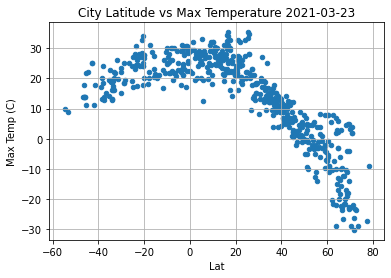

('This graph shows that there is there is a clear relationship between '
 'latitude and max temperature. As the city falls further away from the '
 'equator, the max temperature decreases.')


<Figure size 432x288 with 0 Axes>

In [30]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Max Temp")
plt.title(f"City Latitude vs Max Temperature " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Max Temp (C)")
plt.show()
plt.savefig("Latitude vs. Temperature Plot.png")

pprint("This graph shows that there is there is a clear relationship between latitude and max temperature. As the city falls further away from the equator, the max temperature decreases.")

## Latitude vs. Humidity Plot

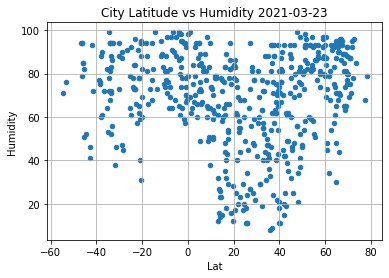

('There does not seem to be a clear relationship between city latitude and '
 'humidity')


<Figure size 432x288 with 0 Axes>

In [33]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Humidity")
plt.title(f"City Latitude vs Humidity " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Humidity")
plt.show()
plt.savefig("Latitude vs. Humidity Plot.png")
pprint("There does not seem to be a clear relationship between city latitude and humidity")

## Latitude vs. Cloudiness Plot

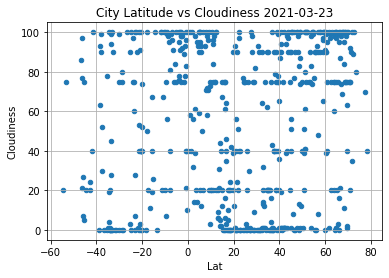

('There does not seem to be a clear relationship between city latitude and '
 'cloudiness')


<Figure size 432x288 with 0 Axes>

In [35]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Cloudiness")
plt.title(f"City Latitude vs Cloudiness " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Latitude vs. Cloudiness Plot.png")
pprint("There does not seem to be a clear relationship between city latitude and cloudiness")

## Latitude vs. Wind Speed Plot

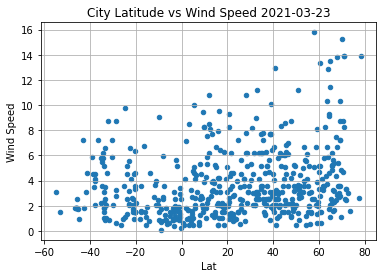

('There does seem to be a weak positive corrlelation betwwen latitude and wind '
 'speed. As we get further from the equator it we do tend to see faster wind '
 'speeds')


<Figure size 432x288 with 0 Axes>

In [37]:
clean_city_data.plot(kind = "scatter", x="Lat", y="Wind Speed")
plt.title(f"City Latitude vs Wind Speed " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Latitude vs. Wind Speed Plot.png")
pprint("There does seem to be a weak positive corrlelation betwwen latitude and wind speed. As we get further from the equator it we do tend to see faster wind speeds")

## Linear Regression

In [39]:
north_hem = clean_city_data.loc[clean_city_data["Lat"] > 0]

south_hem = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

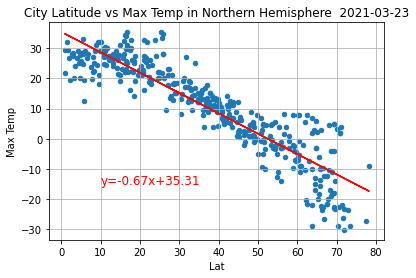

The r-value is 0.8159500395130056
This graph shows that there is a negative relationship between max temp and latitude in the Northern Hemisphere. As the latitude increases the max temperatures decrease


In [43]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Lat"], north_hem["Max Temp"])

regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Lat", y="Max Temp")
plt.plot(north_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Max Temp in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (10, -15), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")

print("This graph shows that there is a negative relationship between max temp and latitude in the Northern Hemisphere. As the latitude increases the max temperatures decrease")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

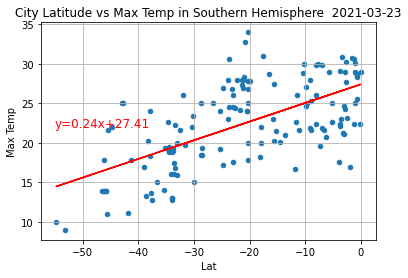

The r-value is 0.39174146704327545
This graph shows that there is a weak positive relationship between max temp and latitude in the Southern Hemisphere. As the latitude increases the max temperatures increases.


In [50]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Lat"], south_hem["Max Temp"])

regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Lat", y="Max Temp")
plt.plot(south_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Max Temp in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-55, 22), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("This graph shows that there is a weak positive relationship between max temp and latitude in the Southern Hemisphere. As the latitude increases the max temperatures increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

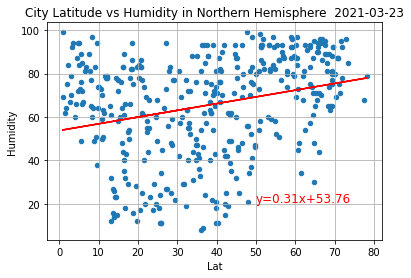

The r-value is 0.07336341112074443
The is no relationship between latitude and humidity in the Northern Hemisphere


In [53]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Lat"], north_hem["Humidity"])

regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Lat", y="Humidity")
plt.plot(north_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Humidity in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (50, 21), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("The is no relationship between latitude and humidity in the Northern Hemisphere")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

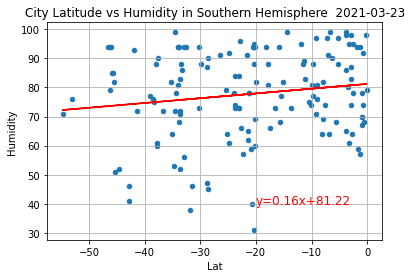

The r-value is 0.024159341859410877
There is no relationship between latitude and humidity in the southern hemisphere


In [55]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Lat"], south_hem["Humidity"])

regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Lat", y="Humidity")
plt.plot(south_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Humidity in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-20, 40), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("There is no relationship between latitude and humidity in the southern hemisphere")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

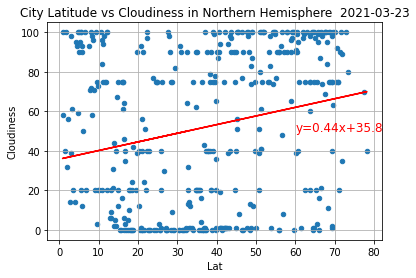

The r-value is 0.051694108080534595
There is no relationship between latitude and cloudiness in the Northern Hemisphere


In [57]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Lat"], north_hem["Cloudiness"])

regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Lat", y="Cloudiness")
plt.plot(north_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Cloudiness in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (60, 50), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("There is no relationship between latitude and cloudiness in the Northern Hemisphere")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

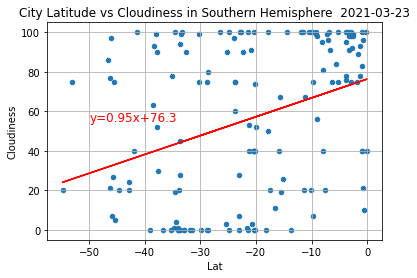

The r-value is 0.12350123207550245
There is no relationship between latitude and cloudiness in the Southern Hemisphere


In [59]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Lat"], south_hem["Cloudiness"])

regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Lat", y="Cloudiness")
plt.plot(south_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Cloudiness in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-50, 55), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("There is no relationship between latitude and cloudiness in the Southern Hemisphere")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

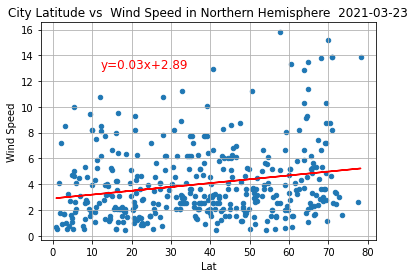

The r-value is 0.04511954176528128
There is no relationship between latitude and wind speed in the Northern Hemisphere


In [62]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hem["Lat"], north_hem["Wind Speed"])

regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

north_hem.plot(kind = "scatter", x="Lat", y="Wind Speed")
plt.plot(north_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs  Wind Speed in Northern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (12, 13), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("There is no relationship between latitude and wind speed in the Northern Hemisphere")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

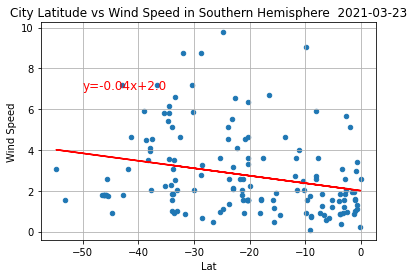

The r-value is 0.0674171395611041
There is no relationship between latitude and wind speed in Southern Hemisphere


In [64]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hem["Lat"], south_hem["Wind Speed"])

regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y=" + str(round(slope, 2)) + "x+" + str(round(intercept, 2))

south_hem.plot(kind = "scatter", x="Lat", y="Wind Speed")
plt.plot(south_hem["Lat"], regress_values, "r-")
plt.title(f"City Latitude vs Wind Speed in Southern Hemisphere  " + datetime.today().strftime('%Y-%m-%d'))
plt.grid()
plt.annotate(line_eq, (-50, 7), fontsize=12, color = "red")
plt.show()
print(f"The r-value is {rvalue**2}")
print("There is no relationship between latitude and wind speed in Southern Hemisphere")